# Import packages

In [1]:
import sys
sys.path.insert(0,"/Users/he/work/gwaslab/src")
import gwaslab as gl

# Download sample sumstats

In [2]:
# Smoking behaviors : Smoking initiation (autosome, male)
!wget -O smoking_male.txt.gz http://jenger.riken.jp/16/

# Smoking behaviors : Smoking initiation (autosome, female)
!wget -O smoking_female.txt.gz http://jenger.riken.jp/18/

--2022-08-31 14:24:13--  http://jenger.riken.jp/16/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161830260 (154M) [text/plain]
Saving to: ‘smoking_male.txt.gz’

smoking_male.txt.gz 100%[===================>] 154.33M  7.59MB/s    in 18s     

2022-08-31 14:24:32 (8.36 MB/s) - ‘smoking_male.txt.gz’ saved [161830260/161830260]

--2022-08-31 14:24:32--  http://jenger.riken.jp/18/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162032083 (155M) [text/plain]
Saving to: ‘smoking_female.txt.gz’

smoking_female.txt. 100%[===================>] 154.53M  9.24MB/s    in 20s     

2022-08-31 14:24:52 (7.68 MB/s) - ‘smoking_female.txt.gz’ saved [162032083/162032083]



In [ ]:
#randomly extract 15 snps for comparison
zcat smoking_female.txt.gz | shuf -n 25 | cut -f 1

In [4]:
# store them in a list
snps = [
"rs6704312",
"rs11516170",
"rs599115",
"rs141218364",
"rs12494861",
"rs11731823",
"rs73112689",
"rs8095963",
"rs2313869",
"rs7477796",
"rs7678318",
"rs13015730",
"rs908785",
"rs6078715",
"rs12971236",
"rs1818238",
"rs62578148",
"rs7579489",
"rs114464235",
"rs584922",
"rs10161166",
"rs4664516",
"rs2924091",
"rs117986209",
"rs10882789"
]

# Creating comparison plot using beta and se

Wed Aug 31 14:24:54 2022 Start to process the raw sumstats for plotting...
Wed Aug 31 14:24:54 2022  -Loading Male SNP list in memory...
Wed Aug 31 14:25:02 2022  -Loading sumstats for Female: SNP,P
Wed Aug 31 14:25:12 2022  -Counting  variants available for both datasets: 5961480  variants...
Wed Aug 31 14:25:17 2022  -Using only variants available for both datasets...
Wed Aug 31 14:25:17 2022  -Extract variants in the given list from Female...
Wed Aug 31 14:25:17 2022  -Loading sumstats for Male: SNP,P
Wed Aug 31 14:25:31 2022  -Extract snps in the given list from Male...
Wed Aug 31 14:25:32 2022 Merging snps from Female and Male...
Wed Aug 31 14:25:32 2022  -Extract statistics of selected variants from Female :  SNP,A1,A2,BETA,SE
Wed Aug 31 14:25:41 2022  -Merging Female effect information...
Wed Aug 31 14:25:46 2022  -Extract statistics of selected variants from Male :  SNP,A1,A2,BETA,SE
Wed Aug 31 14:25:56 2022  -Merging Male effect information...
Wed Aug 31 14:26:01 2022  -Updati

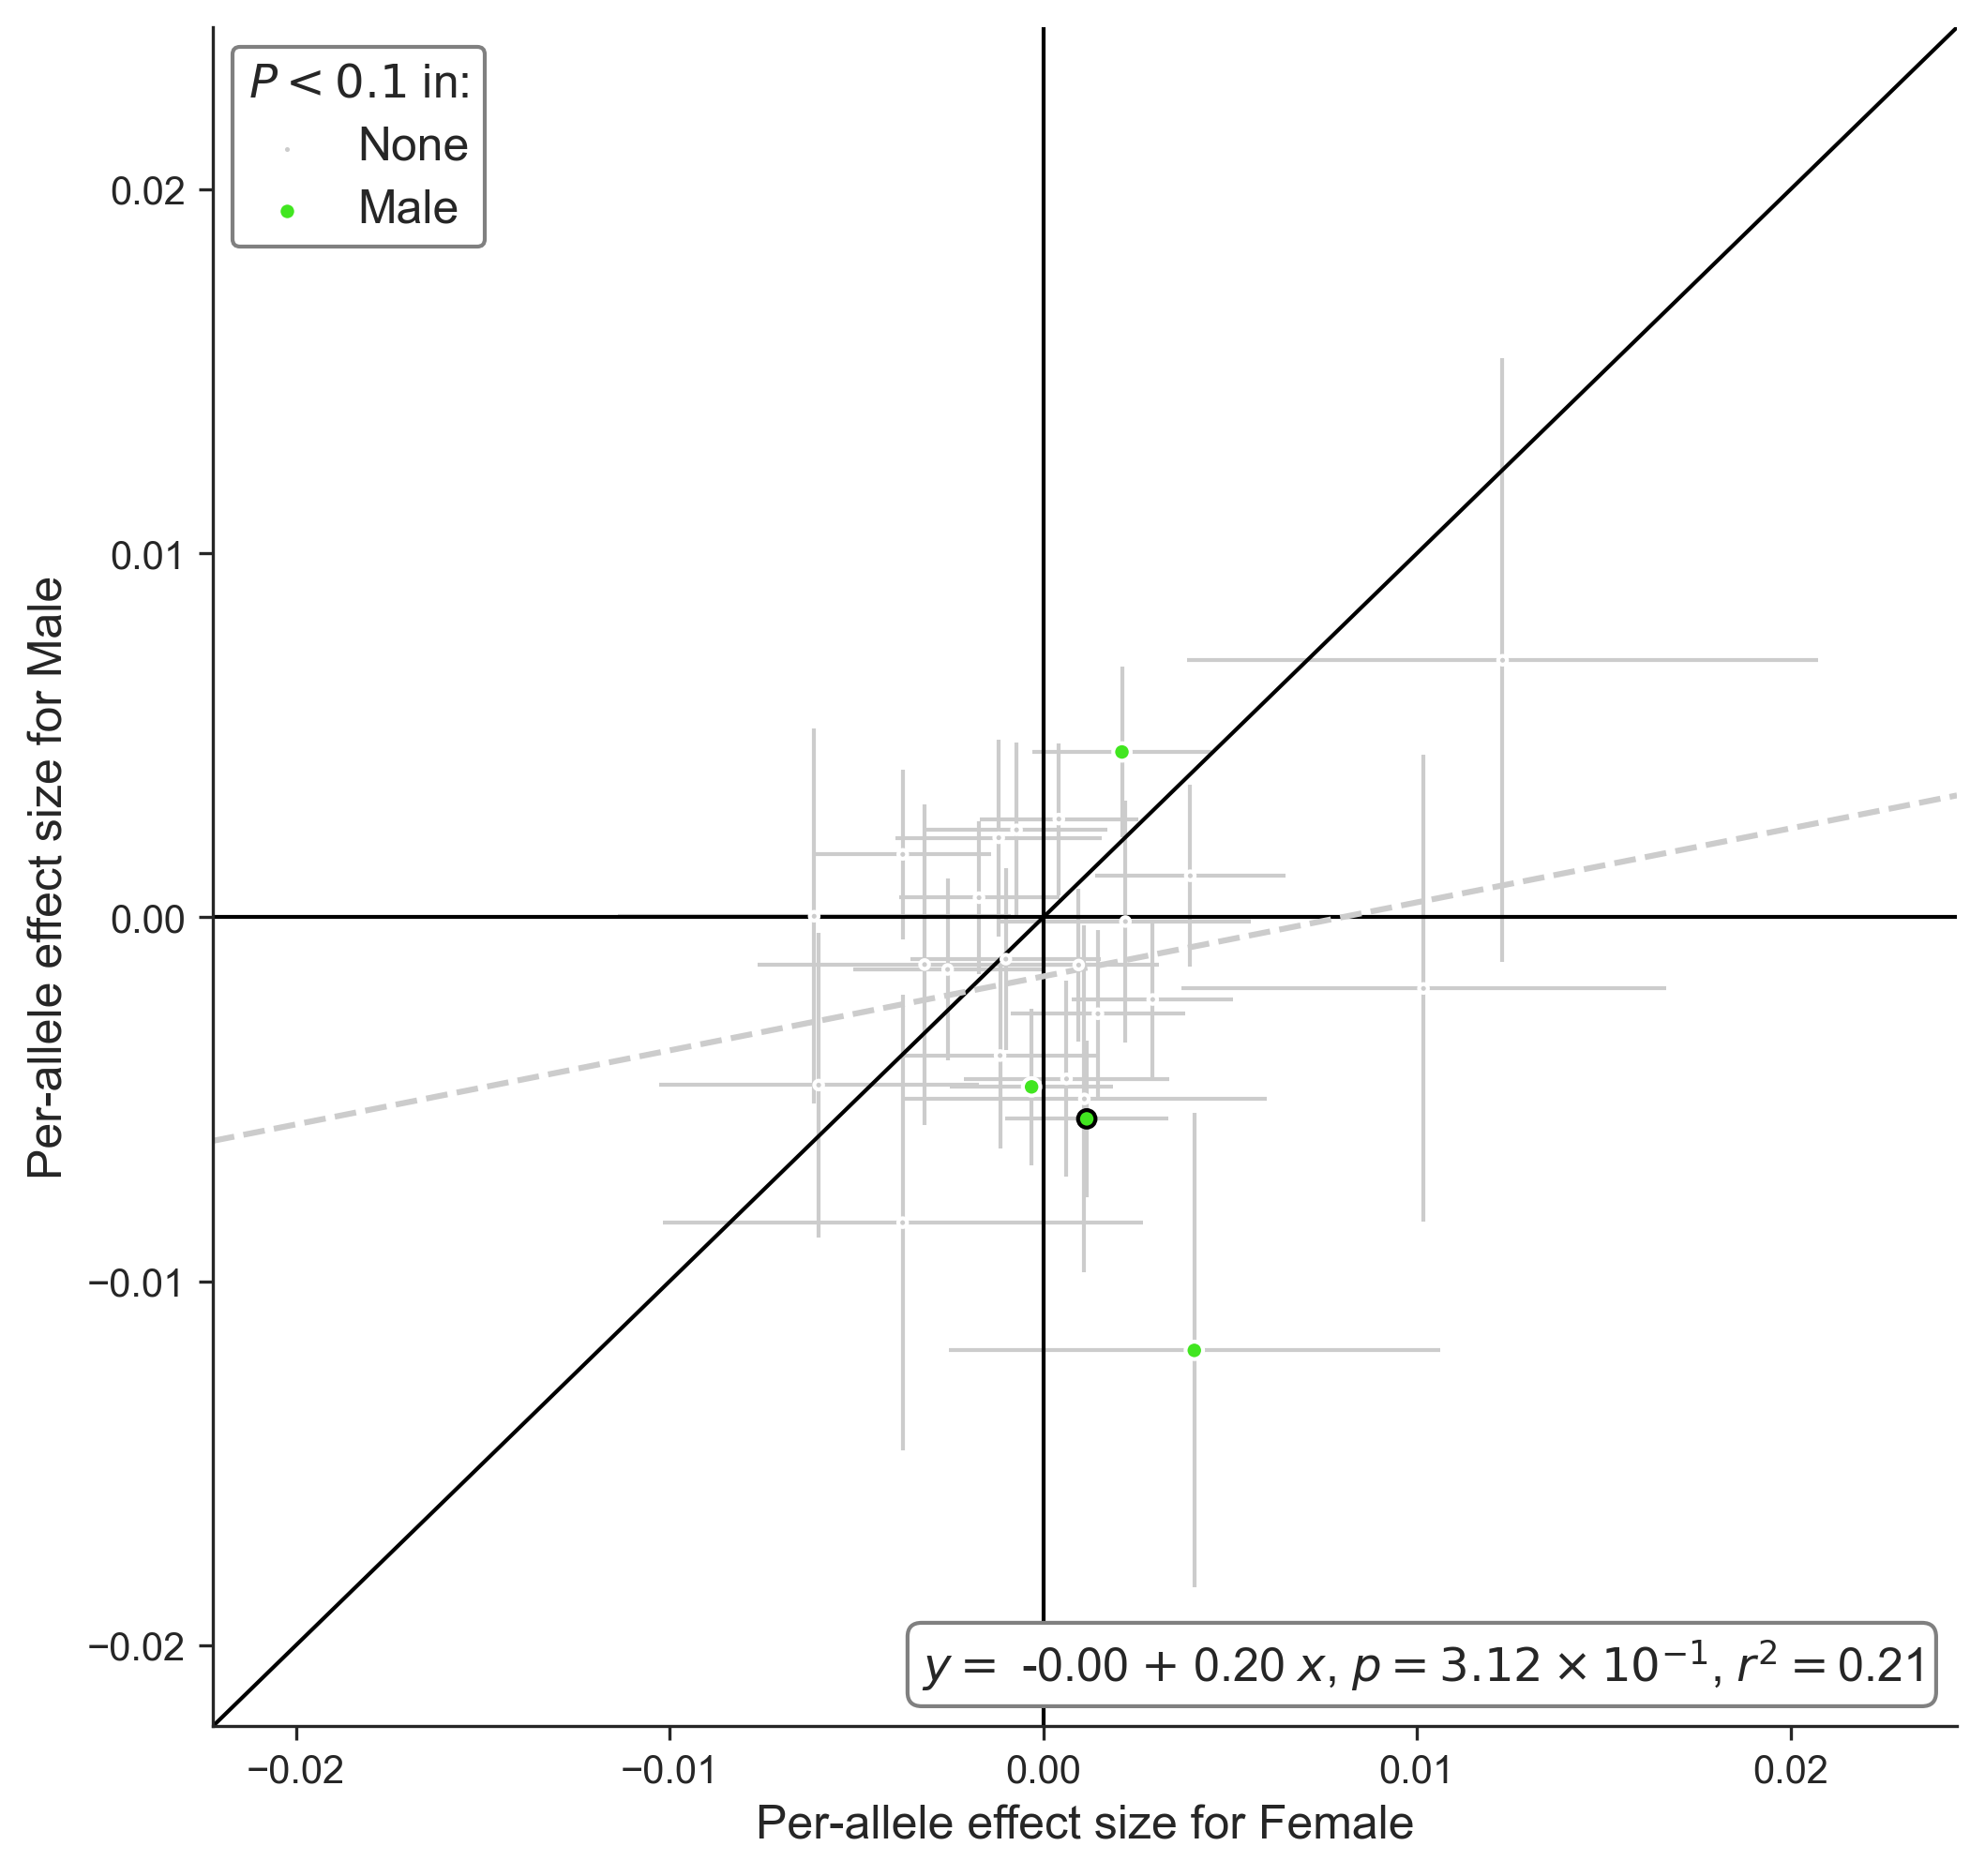

In [5]:
# SNP	CHR	POS	A1	A2	A1Frq	Rsq	BETA	SE	P
a = gl.compare_effect("smoking_female.txt.gz",
                      ["SNP","P","A1","A2","CHR","POS"],["BETA","SE"],
                      "smoking_male.txt.gz",
                      ["SNP","P","A1","A2","CHR","POS"],["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      sig_level=0.1,
                      legend_title=r'$ P < 0.1$ in:',
                      snplist=snps,
                      verbose=True
)

# Check raw data

In [6]:
#data
a[0]

,P_1,P_2,EA_1,NEA_1,EFFECT_1,SE_1,EA_2,NEA_2,EFFECT_2,SE_2,indicator,EA_2_aligned,NEA_2_aligned,EFFECT_2_aligned,Q,HetP,Edge_color
SNPID,,,,,,,,,,,,,,,,,
rs117986209,0.142569,0.394455,T,C,0.012292,0.008432,T,C,0.007063,0.008294,0,T,C,0.007063,0.195442,0.658425,white
rs6704312,0.652104,0.143750,C,G,-0.001155,0.002580,C,G,-0.003797,0.002541,0,C,G,-0.003797,0.532232,0.465670,white
rs13015730,0.821139,0.103218,T,C,0.000623,0.002752,T,C,-0.004438,0.002697,0,T,C,-0.004438,1.724776,0.189079,white
rs4664516,0.532652,0.254464,A,C,0.001463,0.002334,A,C,-0.002648,0.002304,0,A,C,-0.002648,1.571577,0.209978,white
rs7579489,0.890704,0.031574,C,G,-0.000313,0.002188,C,G,-0.004658,0.002146,2,C,G,-0.004658,2.009872,0.156279,white
rs12494861,0.562529,0.184113,A,G,-0.003763,0.006423,A,G,-0.008388,0.006251,0,A,G,-0.008388,0.266213,0.605883,white
rs2313869,0.592396,0.010404,T,C,0.001164,0.002176,T,C,-0.005536,0.002141,2,T,C,-0.005536,4.817887,0.028166,black
rs114464235,0.821139,0.304550,G,A,0.001099,0.004889,G,A,-0.004988,0.004771,0,G,A,-0.004988,0.794119,0.372858,white
rs11731823,0.122403,0.762180,T,C,0.010176,0.006485,T,C,-0.001954,0.006413,0,T,C,-0.001954,1.768576,0.183558,white


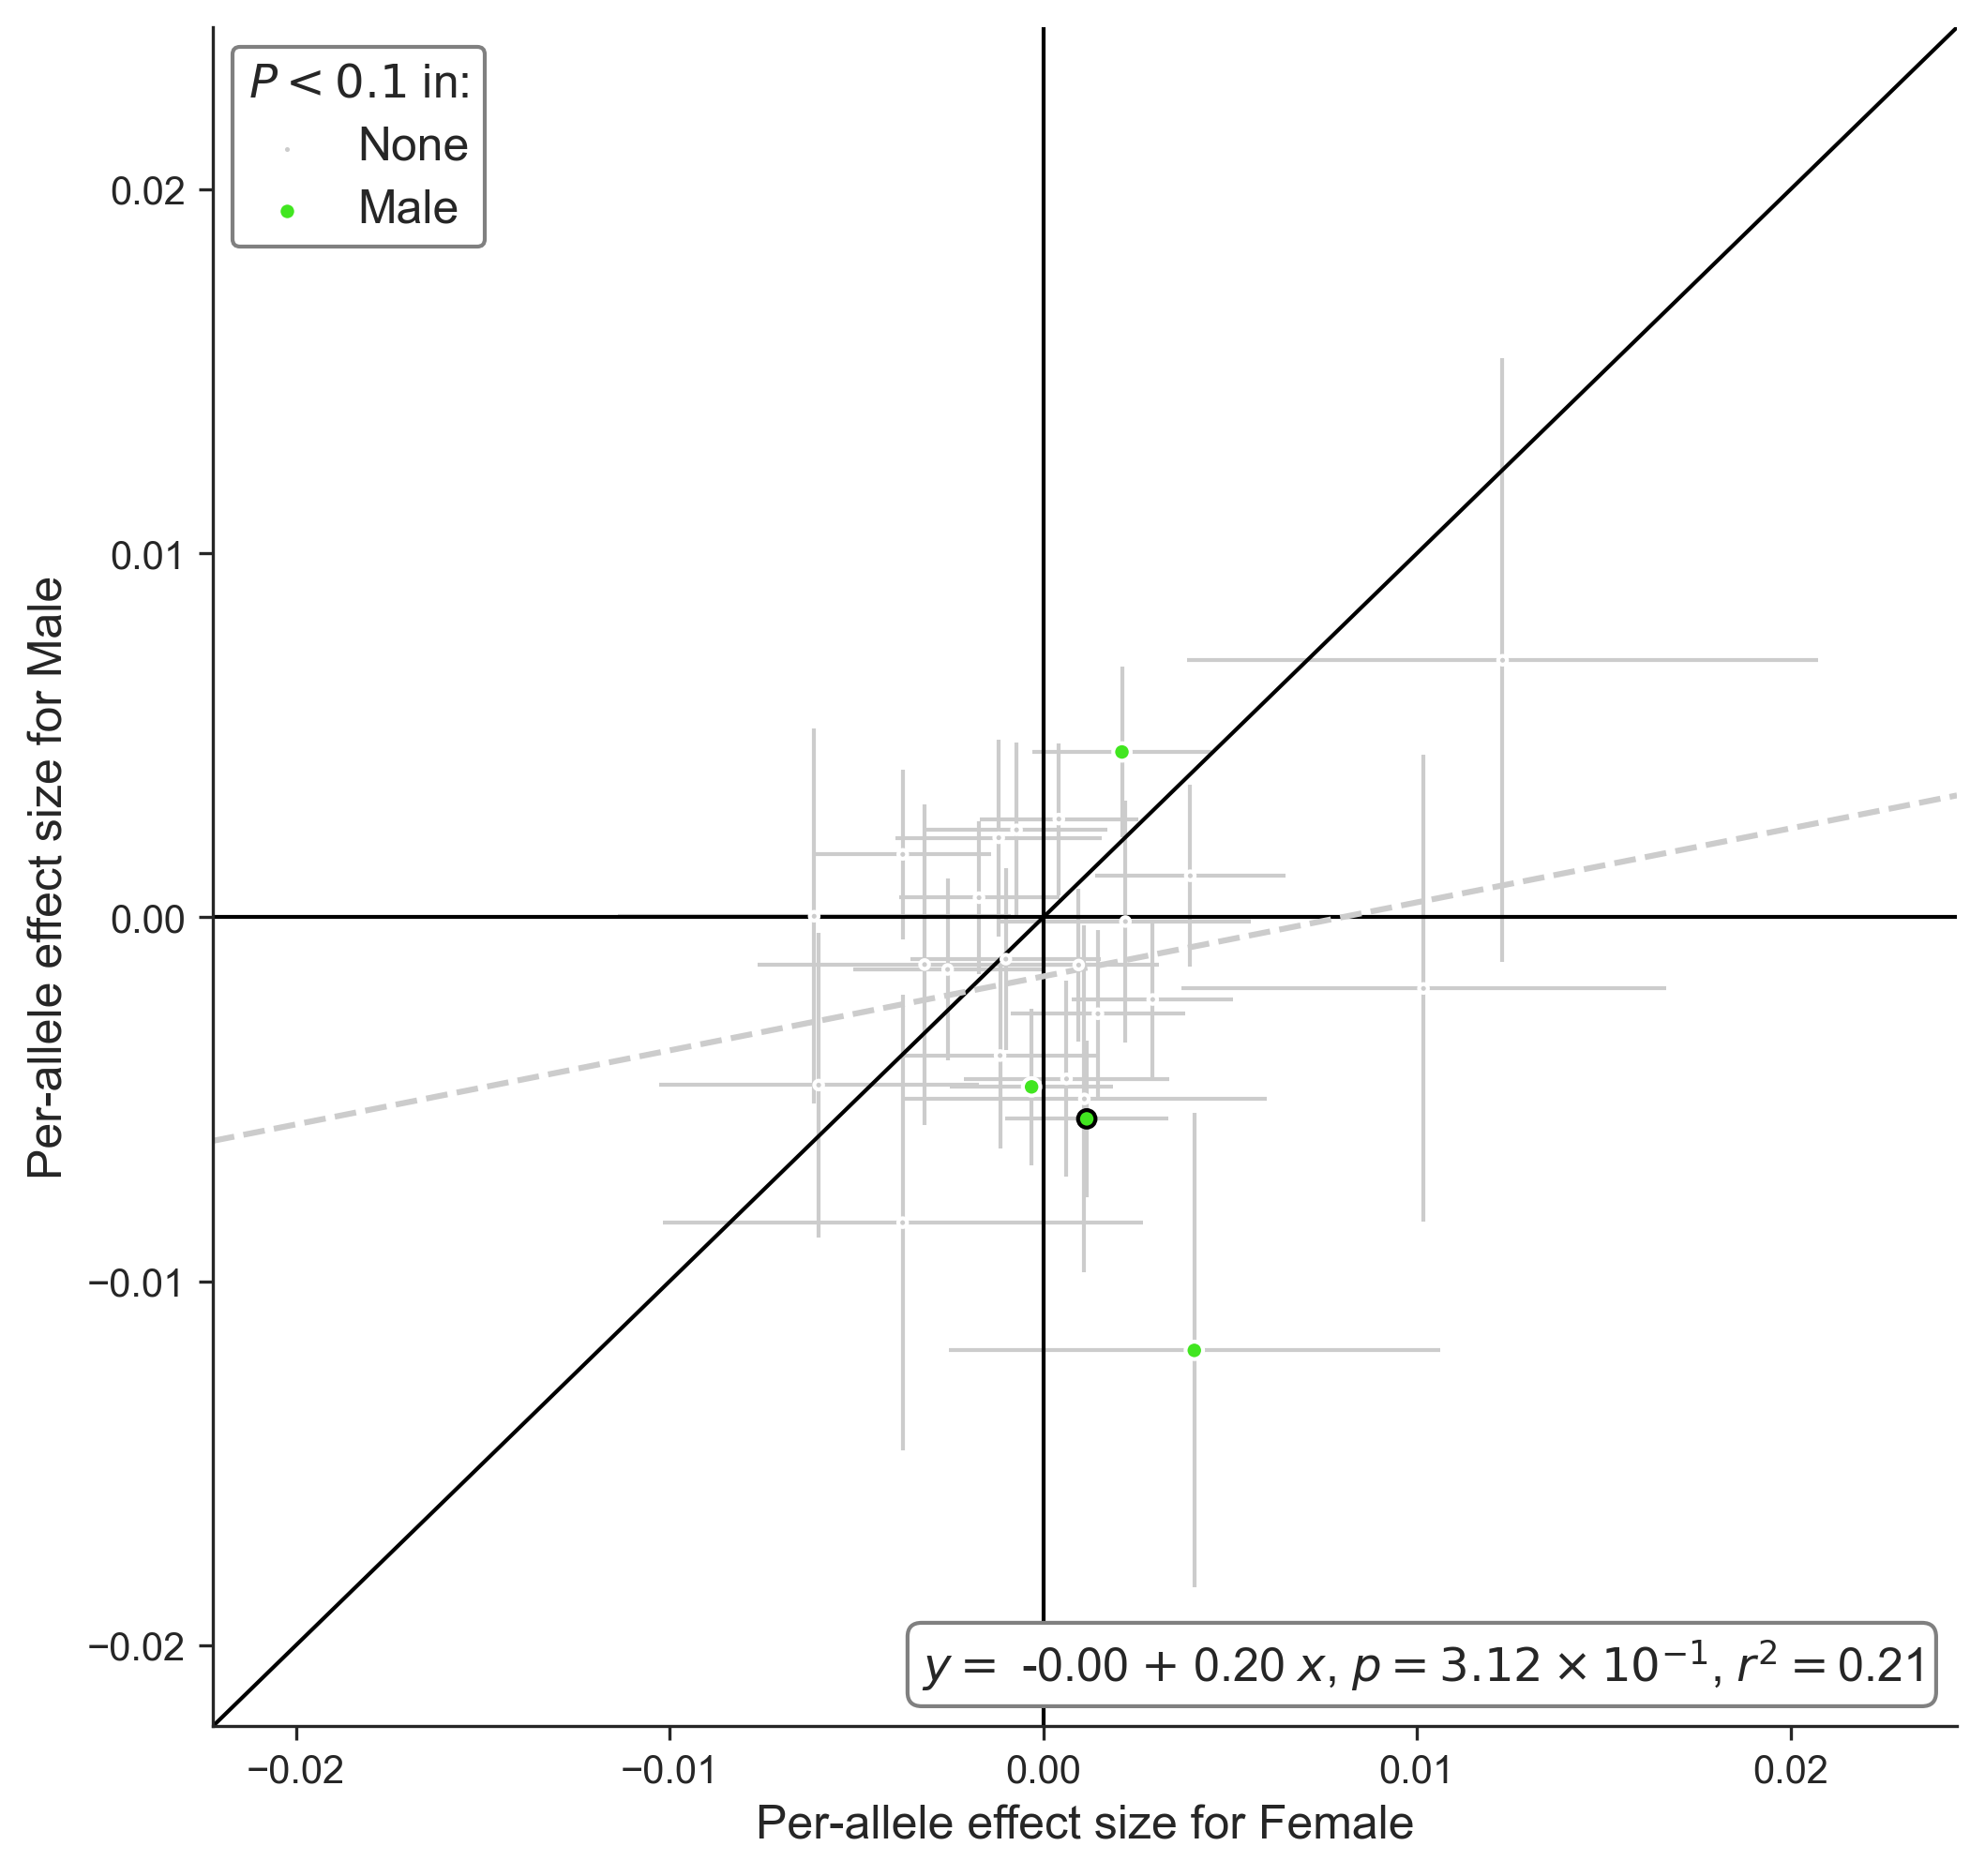

In [7]:
#figure
a[1]

In [8]:
#log
a[2]

# Creating comparison plot using OR, OR_95L and OR_95U

In [9]:
for i in ["male","female"]:
    sumstats = gl.Sumstats("smoking_"+i+".txt.gz",fmt="plink")
    sumstats.fill_data(to_fill=["OR"])
    sumstats.to_format("smoking_"+i+"_or",fmt="plink")

Wed Aug 31 14:26:25 2022 Start to load format from formatbook....
Wed Aug 31 14:26:25 2022  -plink format meta info:
Wed Aug 31 14:26:25 2022   - format_name  :  .assoc.linear, .assoc.logistic, .assoc.dosage
Wed Aug 31 14:26:25 2022   - format_source  :  https://www.cog-genomics.org/plink/1.9/
Wed Aug 31 14:26:25 2022   - format_version  :  Stable (beta 6.26, 2 Apr)
Wed Aug 31 14:26:25 2022  - plink format dictionary:
Wed Aug 31 14:26:25 2022   - plink keys: ['SNP', 'CHR', 'BP', 'A2', 'A1', 'BETA', 'OR', 'SE', 'P', 'INFO', 'L95', 'H95', 'STAT', 'NMISS']
Wed Aug 31 14:26:25 2022   - gwaslab values: ['rsID', 'CHR', 'POS', 'NEA', 'EA', 'BETA', 'OR', 'SE', 'P', 'INFO', 'OR_95L', 'OR_95U', 'Z', 'N']
Wed Aug 31 14:26:25 2022 Initiating from file :smoking_male.txt.gz
Wed Aug 31 14:26:35 2022  -Reading columns          : A1,CHR,BETA,A2,SE,P,SNP
Wed Aug 31 14:26:35 2022  -Renaming columns to      : EA,CHR,BETA,NEA,SE,P,rsID
Wed Aug 31 14:26:35 2022  -Current dataframe shape  : Rows  5961480  x 

Wed Aug 31 14:32:16 2022 Start to process the raw sumstats for plotting...
Wed Aug 31 14:32:16 2022  -Loading Male SNP list in memory...
Wed Aug 31 14:32:23 2022  -Loading sumstats for Female: SNP,P
Wed Aug 31 14:32:31 2022  -Counting  variants available for both datasets: 5961480  variants...
Wed Aug 31 14:32:36 2022  -Using only variants available for both datasets...
Wed Aug 31 14:32:36 2022  -Extract variants in the given list from Female...
Wed Aug 31 14:32:37 2022  -Loading sumstats for Male: SNP,P
Wed Aug 31 14:32:49 2022  -Extract snps in the given list from Male...
Wed Aug 31 14:32:50 2022 Merging snps from Female and Male...
Wed Aug 31 14:32:50 2022  -Extract statistics of selected variants from Female :  SNP,A1,A2,OR,L95,H95
Wed Aug 31 14:32:57 2022  -Merging Female effect information...
Wed Aug 31 14:33:01 2022  -Extract statistics of selected variants from Male :  SNP,A1,A2,OR,L95,H95
Wed Aug 31 14:33:09 2022  -Merging Male effect information...
Wed Aug 31 14:33:13 2022  -

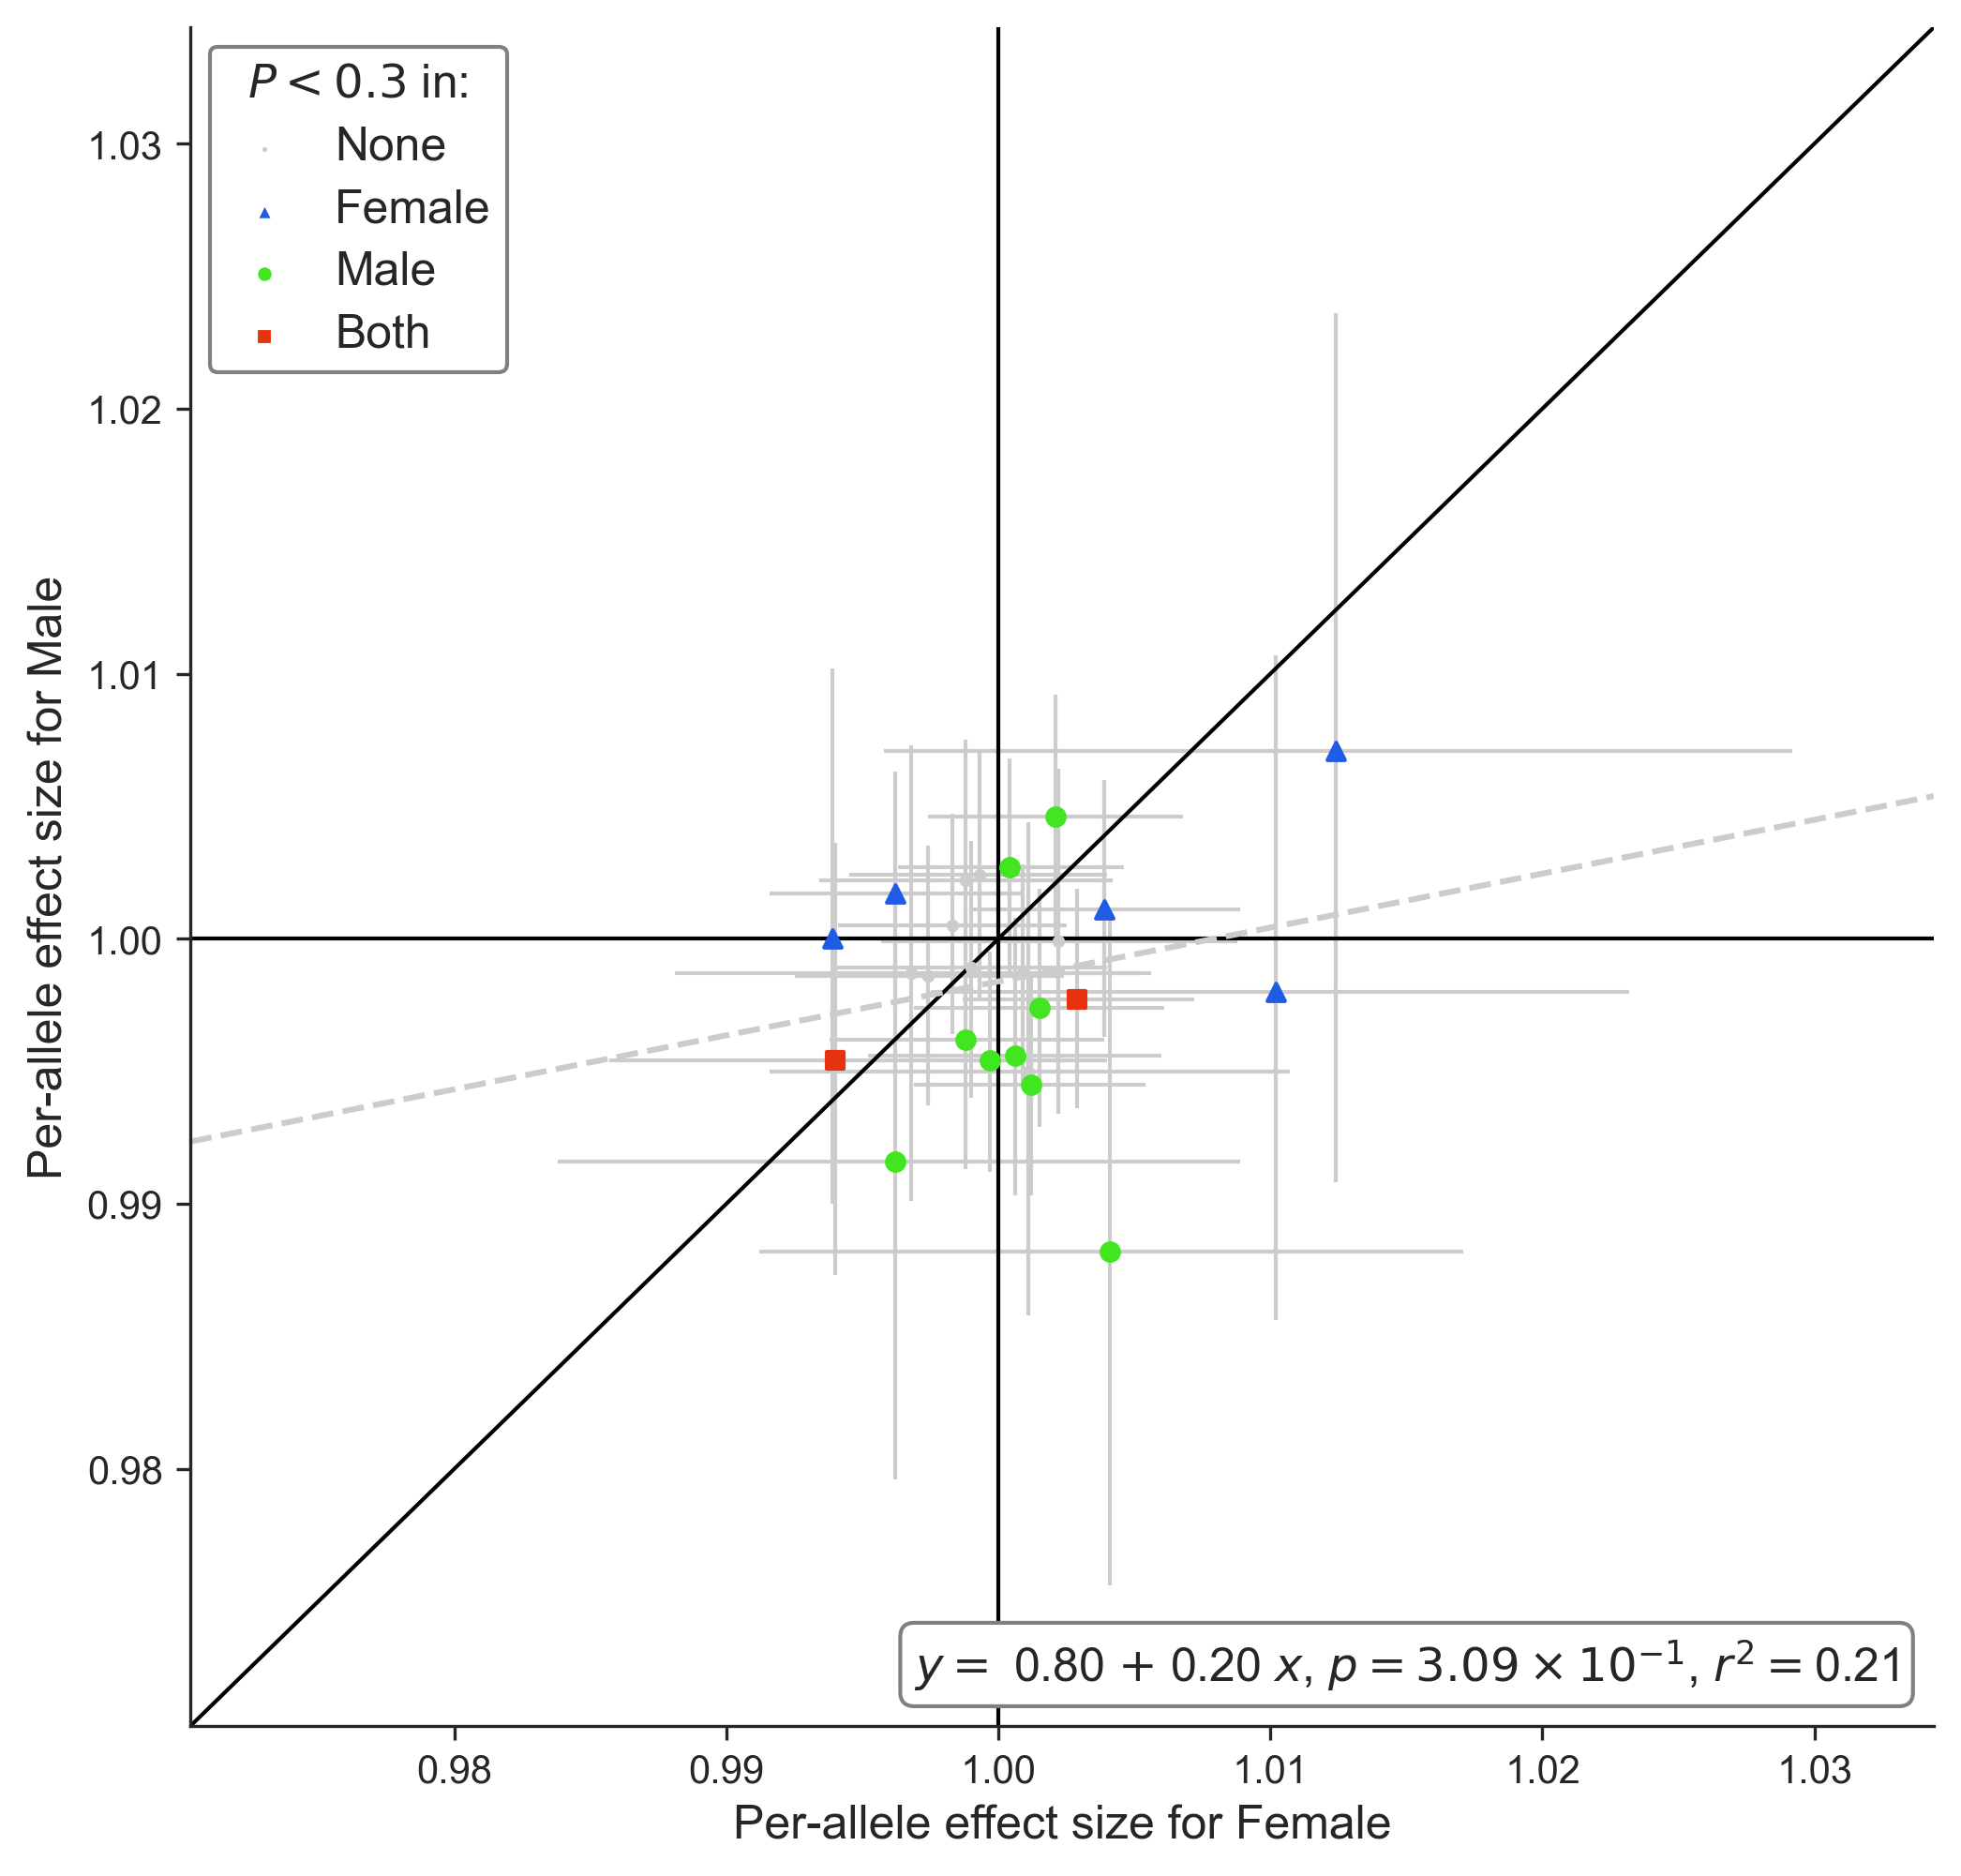

In [10]:
a = gl.compare_effect("smoking_female_or.plink.tsv.gz",
                      ["SNP","P","A1","A2","CHR","POS"],["OR","L95","H95"],
                      "smoking_male_or.plink.tsv.gz",
                      ["SNP","P","A1","A2","CHR","POS"],["OR","L95","H95"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      sig_level=0.3,
                      legend_title=r'$ P < 0.3$ in:',
                      snplist=snps,
                      verbose=True,
                      mode="OR"
)

In [11]:
a[0]

,P_1,P_2,EA_1,NEA_1,OR_1,OR_L_1,OR_H_1,EA_2,NEA_2,OR_2,OR_L_2,OR_H_2,indicator,EA_2_aligned,NEA_2_aligned,OR_2_aligned,OR_L_2_aligned,OR_H_2_aligned
SNPID,,,,,,,,,,,,,,,,,,
rs117986209,0.14257,0.394460,T,C,1.0124,0.0166,0.0168,T,C,1.0071,0.0163,0.0165,1,T,C,1.0071,0.0163,0.0165
rs6704312,0.65210,0.143750,C,G,0.9988,0.0050,0.0051,C,G,0.9962,0.0049,0.0050,2,C,G,0.9962,0.0049,0.0050
rs13015730,0.82114,0.103220,T,C,1.0006,0.0054,0.0054,T,C,0.9956,0.0053,0.0052,2,T,C,0.9956,0.0053,0.0052
rs4664516,0.53265,0.254460,A,C,1.0015,0.0046,0.0046,A,C,0.9974,0.0045,0.0045,2,A,C,0.9974,0.0045,0.0045
rs7579489,0.89070,0.031574,C,G,0.9997,0.0043,0.0043,C,G,0.9954,0.0042,0.0041,2,C,G,0.9954,0.0042,0.0041
rs12494861,0.56253,0.184110,A,G,0.9962,0.0124,0.0127,A,G,0.9916,0.0120,0.0123,2,A,G,0.9916,0.0120,0.0123
rs2313869,0.59240,0.010404,T,C,1.0012,0.0043,0.0042,T,C,0.9945,0.0042,0.0042,2,T,C,0.9945,0.0042,0.0042
rs114464235,0.82114,0.304550,G,A,1.0011,0.0095,0.0096,G,A,0.9950,0.0092,0.0094,0,G,A,0.9950,0.0092,0.0094
rs11731823,0.12240,0.762180,T,C,1.0102,0.0127,0.0130,T,C,0.9980,0.0124,0.0127,1,T,C,0.9980,0.0124,0.0127
